# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
data = pd.read_csv('../data/states_edu.csv')
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
##implementing rename found in tutorials

data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

data.head()




,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [7]:
print(len(data["YEAR"].unique()))

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [8]:
ohioAvg = data[data["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
michAvg = data[data["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
print(ohioAvg, " -- ", michAvg)

if (ohioAvg > michAvg):
    print("boo ohio better")

else:
    print("yass mich go blue")


282.25  --  276.1666666666667
boo ohio better


Find the average for your outcome score across all states in 2019

In [9]:
allAvg2019 = data[data["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()
print(allAvg2019)

281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [10]:
stData = data.groupby("STATE")

stData["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [25]:
#MONEY: TOTAL_REVENUE, FEDERAL/LOCAL/STATE_REVENUE, INSTRUCTION_EXPENDITURE
#SCORES: AVG_READING_8_SCORE
#GRADE NUMS: ENROLL_8, ENROLL_12, ENROLL_HS, ENROLL_ALL

data["EDU_EXPENDITURE_PER_STUDENT"] = data["INSTRUCTION_EXPENDITURE"] / data["ENROLL_ALL"]
data["ENROLLMENT_PCT_RETAINED"] = 100 - ((data["ENROLL_PRIMARY"] - data["ENROLL_HS"]) / data["ENROLL_PRIMARY"] * 100)

data["PCT_EDU_EXPENDITURE"] = data["INSTRUCTION_EXPENDITURE"] / data["TOTAL_EXPENDITURE"] * 100 ## change into pct?


data.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EDU_EXPENDITURE_PER_STUDENT,ENROLLMENT_PCT_CHANGE,PCT_EDU_EXPENDITURE,ENROLLMENT_PCT_RETAINED
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,NaN,55.833300,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693,NaN,51.246082,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,NaN,42.212972,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,NaN,55.324775,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,NaN,52.909138,NaN


Feature engineering justification: "EDU_EXPENDITURE_PER_STUDENT" was created to represent the amount of money spent per student, which allows us to disregard state population and therefore more accurately compare two states' educational expenditure and investment in their students. "ENROLLMENT_PCT_RETAINED" quantifies the percentage of student retention from middle school to high school. This column may help identify a correlation between high school attendance/drop out and test scores. "PCT_EDU_EXPENDITURE" reveals the percent of educational expenditure per total state expenditure, possibly allowing us to identify a state's priorization of education.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Reading Score')

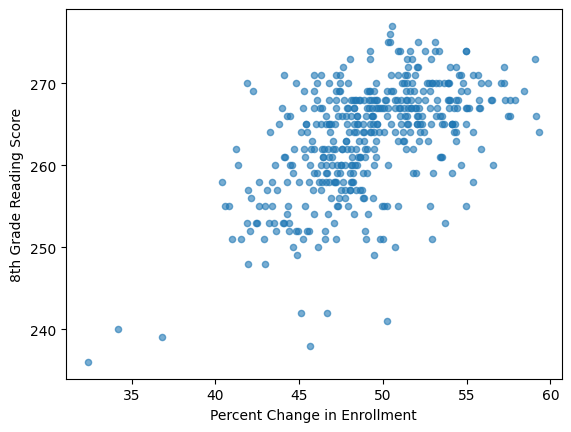

In [26]:
data.plot.scatter(x='ENROLLMENT_PCT_RETAINED', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('Percent Change in Enrollment') #help
plt.ylabel('8th Grade Reading Score')



Observations: Data generally follows upwards linear trend, reflecting somewhat of a correlation between 8th grade reading scores and student retention. Data distribution is not very precise.

**Percent Change in Enrollment vs 8th Grade Reading Score**

**Visualization 2**

Text(0, 0.5, '8th Grade Reading Score')

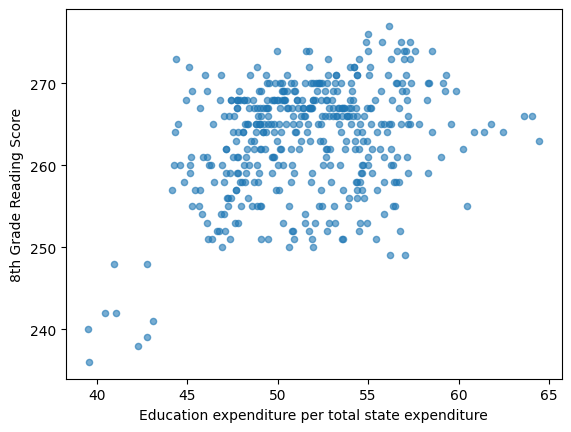

In [16]:
data.plot.scatter(x='PCT_EDU_EXPENDITURE', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('Education expenditure per total state expenditure')
plt.ylabel('8th Grade Reading Score')

Observations: Data points are very distributed and therefore not precise. Majority of data falls within the range of 45-60 pct education expenditure and 250-270 reading score. If any trend exists, it may be a slight upwards linear relationship.

**Percent of Education Expenditure vs 8th Grade Reading Score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [18]:
from sklearn.model_selection import train_test_split

In [36]:
X = data[['PCT_EDU_EXPENDITURE', 'ENROLLMENT_PCT_RETAINED', 'EDU_EXPENDITURE_PER_STUDENT']].dropna()
y = data.loc[X.index]['AVG_READING_8_SCORE']

y.fillna(y.mean(), inplace = True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [31]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [33]:
# create your model here
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [43]:
#score
print("score: ", model.score(X_test, y_test))

#abs error
print("abs error: ", np.mean(np.abs(y_pred-y_test)))

#root mean square error
print("root mean sq error: ", np.mean((y_pred-y_test)**2)**0.5)

score:  0.16132044520462774
abs error:  3.2699689794443345
root mean sq error:  4.9213324885016245


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

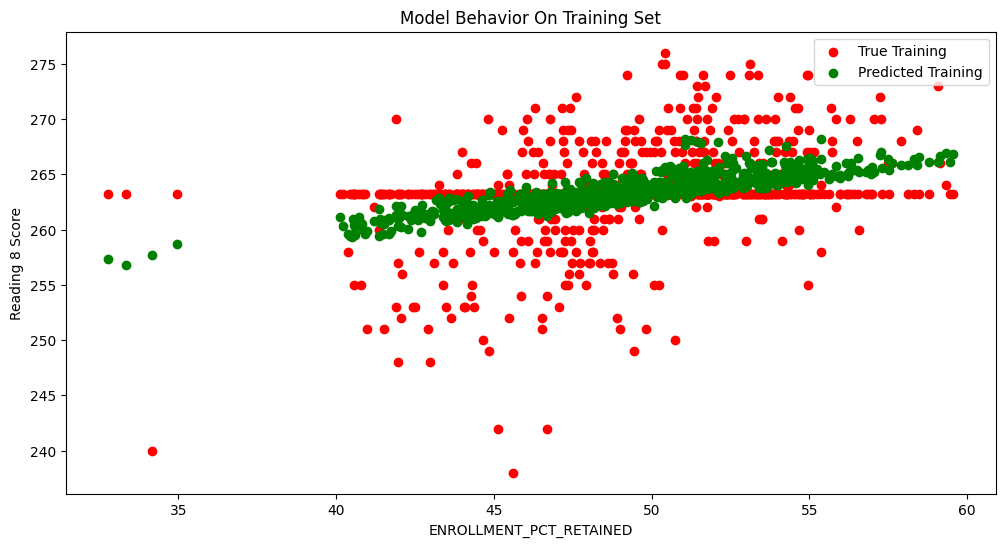

In [44]:
col_name = 'ENROLLMENT_PCT_RETAINED'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Reading 8 Score')

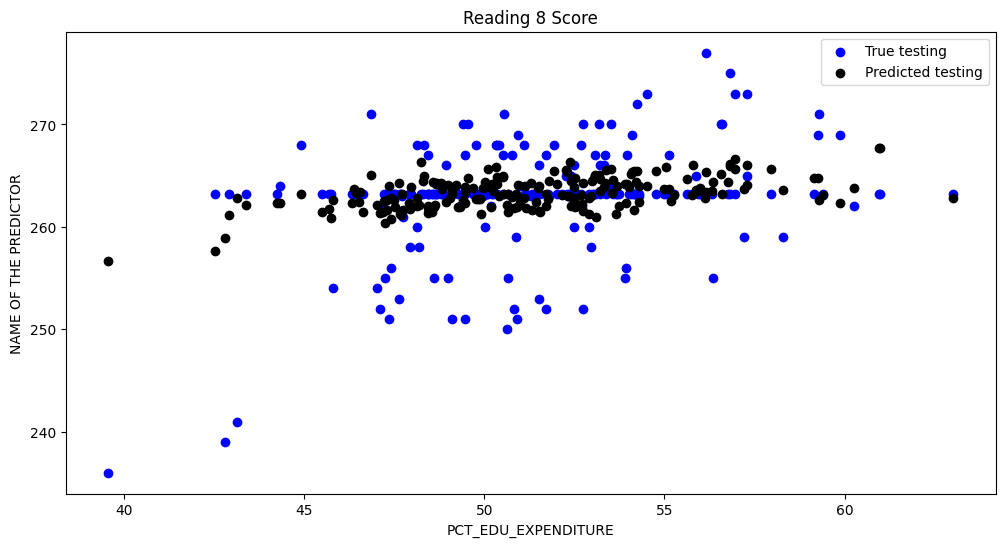

In [45]:
col_name = 'PCT_EDU_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Reading 8 Score")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In this checkpoint, I trained a machine model with national education data sets to identify possible predictors for 8th grade reading scores. From given data, I created two additional sets called 'PCT_EDU_EXPENDITURE', which found the percent of total state expenditure that went to education, and 'ENROLLMENT_PCT_RETAINED', which found the percent change in school enrollment from middle school to high school, as I believed that they may correlate to school performance. Upon graphing the former new category in relation to 8th grade reading scores, a general, medium-low precision upwards trend could be identified, revealing somewhat of a positive linear relationship between the two sets of data. On the other hand, the other new category was very imprecise and revealed a disorderly distribution of data points. Using this data, I trained a model with sklearn's LinearRegression class to create low-error data predictions. Low model scoring, high absolute error, and high root mean square error revealed that the model didn't perform very well in predicting relationships. This may lead to the conclusion that the percent of state expenditure on education as well as student retention doesn't correlate directly with 8th grade reading scores, or that the model may have implemented poorly.